In [2]:
#imports
import pandas as pd
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler

In [3]:
#read in data
drought = pd.read_csv('../data/final2_merged_drought_temp.csv')

#### David's Code

In [4]:
drought['climate_regions']=drought['Name']

In [5]:
oh='Ohio Valley'
ohio_valley=dict.fromkeys(['Illinois','Indiana','Kentucky','Missouri',
             'Ohio','Tennessee','West Virginia'],oh)
#https://stackoverflow.com/questions/11977730/creating-a-dictionary-with-same-values

In [6]:
oh_list=['Illinois','Indiana','Kentucky','Missouri',
             'Ohio','Tennessee','West Virginia']

In [7]:
def state_region_dict(list_states,string_region):
    return dict.fromkeys(list_states,string_region)
#function to combine states and region into dictionary


In [8]:
um_list=['Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
um_region='Upper Midwest'
upper_midwest=state_region_dict(um_list,um_region)


In [9]:
ne_list=['Connecticut','Delaware','Maine','Maryland','Massachusetts', 'New Hampshire', 'New Jersey',
        'New York', 'Pennsylvania','Rhode Island','Vermont']
ne_region='Northeast'
north_east=state_region_dict(ne_list,ne_region)

In [10]:
nw_list=['Idaho','Oregon','Washington']
nw_region='Northwest'
north_west=state_region_dict(nw_list,nw_region)

s_list=['Arkansas','Kansas','Louisiana','Mississippi','Oklahoma','Texas']
s_region='South'
south=state_region_dict(s_list,s_region)

se_list=['Alabama','Florida','Georgia','North Carolina','South Carolina','Virginia']
se_region='Southeast'
south_east=state_region_dict(se_list,se_region)

sw_list=['Arizona','Colorado','New Mexico','Utah']
sw_region='Southwest'
south_west=state_region_dict(sw_list,sw_region)

w_list=['California','Nevada']
w_region='West'
west=state_region_dict(w_list,w_region)

wnc_list=['Montana','Nebraska','North Dakota','South Dakota','Wyoming']
wnc_region='Northern Rockies and Plains'
northern_rockies=state_region_dict(wnc_list,wnc_region)

In [11]:
final_dict={**ohio_valley,**upper_midwest,**north_east,**north_west,**south,
            **south_east,**south_west,**west,**northern_rockies}
#combine multiple dictionaries into one
#https://towardsdatascience.com/merge-dictionaries-in-python-d4e9ce137374

In [12]:
drought['climate_regions']=drought['Name']

In [13]:
#Replaced initial values with dictionary region values
drought.replace({'climate_regions':final_dict},inplace=True)
#https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/

In [14]:
drought['ValidEnd'] = pd.to_datetime(drought['ValidEnd'])

In [15]:
drought = drought[drought['ValidEnd']<'2021-01-01']

In [16]:
ohio_valley = drought[drought['climate_regions'] == 'Ohio Valley']

In [17]:
west = drought[drought['climate_regions'] == 'West']

In [18]:
up_mid = drought[drought['climate_regions'] == 'Upper Midwest']

In [19]:
nrp = drought[drought['climate_regions'] == 'Northern Rockies and Plains']

In [20]:
ne = drought[drought['climate_regions'] == 'Northeast']

In [21]:
nw = drought[drought['climate_regions'] == 'Northwest']

In [22]:
south = drought[drought['climate_regions'] == 'South']

In [23]:
sw = drought[drought['climate_regions'] == 'Southwest']

In [24]:
se = sw = drought[drought['climate_regions'] == 'Southeast']

In [25]:
ohio_valley

,ValidEnd,Name,state,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,...,population_d4,DSCI,total_area,total_population,climate_regions,avg_tmax,avg_tmin,total_avg_prcp_inches,temp_id,total_avg_prcp_mm
10451,2020-12-28,Illinois,IL,33454.57,15550.66,6236.48,1140.83,0.0,0.0,8875219.25,...,0.0,56,56382.54,12847389.79,Ohio Valley,38.465714,17.117143,0.108000,119,2.743200
10452,2020-12-21,Illinois,IL,33454.57,15550.66,6236.48,1140.83,0.0,0.0,8875219.25,...,0.0,56,56382.54,12847389.79,Ohio Valley,39.528571,26.411429,0.006000,119,0.152400
10453,2020-12-14,Illinois,IL,32814.14,16191.10,6236.48,1140.83,0.0,0.0,8839298.46,...,0.0,57,56382.55,12847389.79,Ohio Valley,44.220000,29.057143,1.026000,119,26.060400
10454,2020-12-07,Illinois,IL,32794.13,18023.24,4619.65,945.53,0.0,0.0,8650968.46,...,0.0,53,56382.55,12847389.80,Ohio Valley,43.485714,24.954286,0.000000,119,0.000000
10455,2020-11-30,Illinois,IL,28067.62,21244.44,6124.95,945.53,0.0,0.0,8375517.01,...,0.0,64,56382.54,12847389.80,Ohio Valley,46.328571,32.782857,1.082000,119,27.482800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45975,2001-01-29,West Virginia,WV,3547.74,19253.58,1403.34,0.00,0.0,0.0,261876.40,...,0.0,91,24204.66,1852994.01,Ohio Valley,40.380952,19.880952,0.223333,77,5.672667
45976,2001-01-22,West Virginia,WV,5496.60,14287.99,3143.43,1276.64,0.0,0.0,443651.89,...,0.0,101,24204.66,1852994.00,Ohio Valley,35.142857,23.095238,1.165000,77,29.591000
45977,2001-01-15,West Virginia,WV,7763.39,12021.20,3143.44,1276.64,0.0,0.0,664684.83,...,0.0,91,24204.67,1852994.00,Ohio Valley,43.904762,24.714286,0.008333,77,0.211667
45978,2001-01-08,West Virginia,WV,7763.16,12391.29,3670.41,379.81,0.0,0.0,664647.42,...,0.0,86,24204.67,1852993.99,Ohio Valley,33.119048,21.452381,0.055000,77,1.397000


#### Julio's Code

In [26]:
#julio's code
west=west.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum', 'avg_tmax': 'mean', 'avg_tmin': 'mean', 'total_avg_prcp_inches':'sum', 'total_avg_prcp_mm': 'sum'})

In [27]:
west

,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,population_d0,population_d1,population_d2,population_d3,population_d4,DSCI,total_population,total_area,avg_tmax,avg_tmin,total_avg_prcp_inches,total_avg_prcp_mm
ValidEnd,,,,,,,,,,,,,,,,,,,
2001-01-01,268682.71,0.00,0.00,0.00,0.00,0.00,39954507.39,0.00,0.00,0.00,0.00,0.00,0.0,39954507.39,268682.71,55.340909,25.125000,0.000000,0.000000
2001-01-08,219867.53,48815.18,0.00,0.00,0.00,0.00,19148835.12,20805672.27,0.00,0.00,0.00,0.00,15.5,39954507.39,268682.71,56.907792,26.157468,0.573636,14.570364
2001-01-15,183369.34,85313.37,0.00,0.00,0.00,0.00,19147061.90,20807445.49,0.00,0.00,0.00,0.00,29.5,39954507.39,268682.71,45.813312,28.798701,1.895909,48.156091
2001-01-22,229132.27,39550.44,0.00,0.00,0.00,0.00,38419211.81,1535295.58,0.00,0.00,0.00,0.00,15.0,39954507.39,268682.71,47.125649,23.713312,0.072500,1.841500
2001-01-29,193653.20,75029.51,0.00,0.00,0.00,0.00,38179628.97,1774878.42,0.00,0.00,0.00,0.00,28.5,39954507.39,268682.71,46.303571,27.376623,1.511818,38.400182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,5542.04,34654.88,60303.12,60478.93,88304.37,19399.37,5547783.11,14970129.93,5063039.47,10253169.73,2805310.34,1315074.81,304.5,39954507.39,268682.71,56.321537,27.510931,0.078106,1.983894
2020-12-07,5473.73,34723.19,60303.12,60312.51,84406.25,23463.92,5523003.27,14994909.77,5063039.47,10252697.32,2798285.43,1322572.14,306.5,39954507.40,268682.72,57.441558,25.848864,0.075455,1.916545
2020-12-14,0.00,7958.10,54374.95,93821.89,89063.85,23463.92,0.00,6801658.18,16499875.50,12485483.68,2844917.89,1322572.14,333.0,39954507.39,268682.71,52.524567,28.696212,0.907500,23.050500


#### Son's Code

In [28]:
#imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * 
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model


In [29]:
#plotting Drought history
def plot_dsci(region, name):
    region['DSCI'].plot(figsize = (10, 8))
    plt.xlabel("Year")
    plt.ylabel("DSCI (Severity Level)")
    plt.title(f'{name} Region Drought Severity 2001-2020')
    plt.savefig('fig.png')

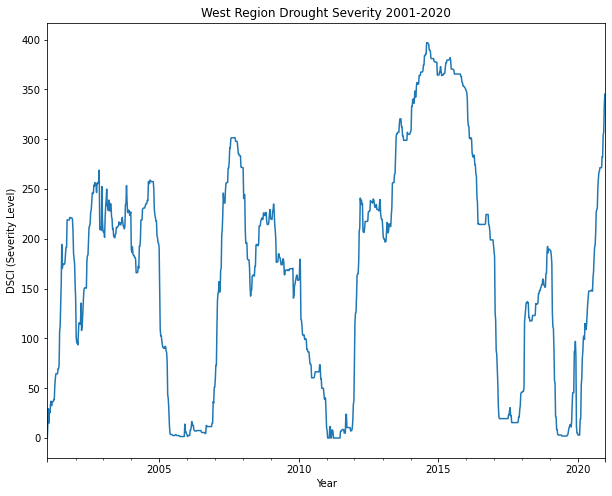

In [30]:
#looking at west drought severity
plot_dsci(west, 'West')

In [31]:
#creating function to create window size and DF input. window size or kernal size 
#is used by NN to make predictions on next iteration.
# Code modified from Greg Hogg https://www.youtube.com/watch?v=kGdbPnMCdOg
def df_to_X_y(df, windowsize=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-windowsize):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [32]:
WINDOW_SIZE = 5
X, y = df_to_X_y(west['DSCI'], WINDOW_SIZE)
X.shape, y.shape

((1039, 5, 1), (1039,))

In [33]:
#Creating training, val, and test set as shown By Hogg. https://www.youtube.com/watch?v=kGdbPnMCdOg
X_train, y_train = X[:750], y[:750]
X_val, y_val = X[750:850], y[750:850]
X_test, y_test = X[850:], y[850:]

In [34]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [35]:
#Model checkpoint, saving best model. 
#Loss function is measured on MSE and metrics used is RMSE
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [36]:
#Saving history to view loss
history = (model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp]))

Epoch 1/10
16/24 [===================>..........] - ETA: 0s - loss: 43115.3242 - root_mean_squared_error: 207.6423 

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


24/24 [==============================] - 4s 137ms/step - loss: 42144.6992 - root_mean_squared_error: 205.2917 - val_loss: 66857.0234 - val_root_mean_squared_error: 258.5673
Epoch 2/10
17/24 [====================>.........] - ETA: 0s - loss: 38331.3906 - root_mean_squared_error: 195.7840

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


24/24 [==============================] - 3s 119ms/step - loss: 37049.9531 - root_mean_squared_error: 192.4836 - val_loss: 57448.0664 - val_root_mean_squared_error: 239.6833
Epoch 3/10
17/24 [====================>.........] - ETA: 0s - loss: 32238.4785 - root_mean_squared_error: 179.5508

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


24/24 [==============================] - 3s 111ms/step - loss: 30359.4434 - root_mean_squared_error: 174.2396 - val_loss: 46524.5938 - val_root_mean_squared_error: 215.6956
Epoch 4/10
15/24 [=================>............] - ETA: 0s - loss: 23604.8066 - root_mean_squared_error: 153.6386

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


24/24 [==============================] - 3s 124ms/step - loss: 22499.2676 - root_mean_squared_error: 149.9976 - val_loss: 34728.2695 - val_root_mean_squared_error: 186.3552
Epoch 5/10
19/24 [======================>.......] - ETA: 0s - loss: 14736.5195 - root_mean_squared_error: 121.3941

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


24/24 [==============================] - 3s 135ms/step - loss: 14984.5684 - root_mean_squared_error: 122.4115 - val_loss: 23842.0859 - val_root_mean_squared_error: 154.4088
Epoch 6/10
15/24 [=================>............] - ETA: 0s - loss: 9565.7520 - root_mean_squared_error: 97.8047  

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


24/24 [==============================] - 3s 133ms/step - loss: 9016.4277 - root_mean_squared_error: 94.9549 - val_loss: 14889.5898 - val_root_mean_squared_error: 122.0229
Epoch 7/10
16/24 [===================>..........] - ETA: 0s - loss: 5839.3560 - root_mean_squared_error: 76.4157

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


24/24 [==============================] - 3s 110ms/step - loss: 5192.0605 - root_mean_squared_error: 72.0560 - val_loss: 9229.1885 - val_root_mean_squared_error: 96.0687
Epoch 8/10
17/24 [====================>.........] - ETA: 0s - loss: 3687.1470 - root_mean_squared_error: 60.7219

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


24/24 [==============================] - 3s 128ms/step - loss: 3151.5979 - root_mean_squared_error: 56.1391 - val_loss: 6090.4194 - val_root_mean_squared_error: 78.0411
Epoch 9/10
24/24 [==============================] - ETA: 0s - loss: 2072.5713 - root_mean_squared_error: 45.5255

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


24/24 [==============================] - 4s 153ms/step - loss: 2072.5713 - root_mean_squared_error: 45.5255 - val_loss: 4273.8599 - val_root_mean_squared_error: 65.3748
Epoch 10/10
24/24 [==============================] - ETA: 0s - loss: 1489.6598 - root_mean_squared_error: 38.5961

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


24/24 [==============================] - 4s 156ms/step - loss: 1489.6598 - root_mean_squared_error: 38.5961 - val_loss: 2853.0928 - val_root_mean_squared_error: 53.4143


In [37]:
#Creating DF for loss history
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,42144.699219,205.291748,66857.023438,258.567261
1,37049.953125,192.483643,57448.066406,239.683258
2,30359.443359,174.239609,46524.593750,215.695602
3,22499.267578,149.997559,34728.269531,186.355225
4,14984.568359,122.411469,23842.085938,154.408829
5,9016.427734,94.954872,14889.589844,122.022903
6,5192.060547,72.055954,9229.188477,96.068665
7,3151.597900,56.139095,6090.419434,78.041138
8,2072.571289,45.525501,4273.859863,65.374763
9,1489.659790,38.596111,2853.092773,53.414349


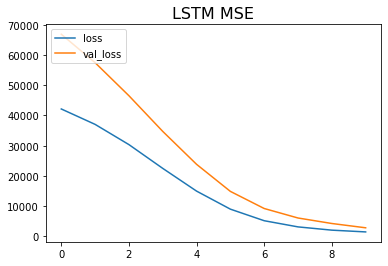

In [38]:
#plotting loss
history_df.filter(like='loss').plot()
plt.title("LSTM MSE", fontsize=16)
plt.legend(loc='upper left')
plt.savefig('fig2.png')

In [39]:
#loading in best model from memory.
model1 = load_model("model1/")

In [40]:
#Predictions
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals': y_train})
train_results

,Train Predictions,Actuals
0,18.516102,25.5
1,25.718834,34.0
2,32.342590,37.0
3,38.092957,32.5
4,27.284458,36.0
...,...,...
745,269.151703,379.5
746,269.151703,380.0
747,269.151886,380.5
748,269.152130,382.0


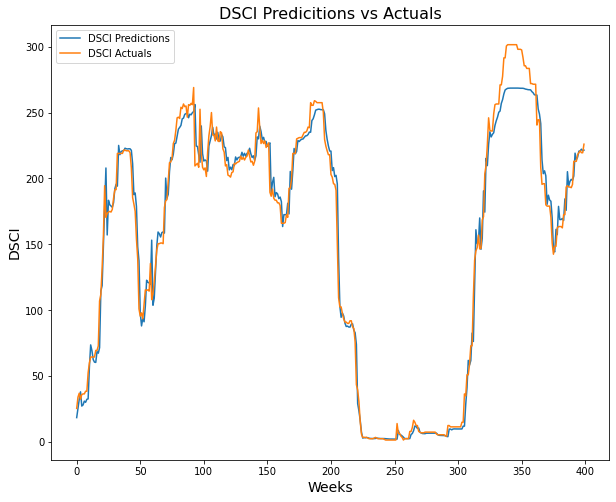

In [41]:
#plot pred vs actuals
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(train_results['Train Predictions'][:400], label = 'DSCI Predictions')
plt.plot(train_results['Actuals'][:400], label = "DSCI Actuals")
plt.xlabel("Weeks", fontsize=14)
plt.ylabel("DSCI", fontsize=14)
plt.title("DSCI Predicitions vs Actuals", fontsize=16)
plt.legend(loc='upper left')
plt.savefig('fig1.png')

In [42]:
#Validation set results
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals': y_val})
val_results

,Val Predictions,Actuals
0,269.151489,370.5
1,269.147217,370.5
2,269.146362,370.5
3,269.145874,370.5
4,269.145813,370.0
...,...,...
95,14.221318,19.5
96,14.221320,19.5
97,14.221320,19.5
98,14.221320,19.5


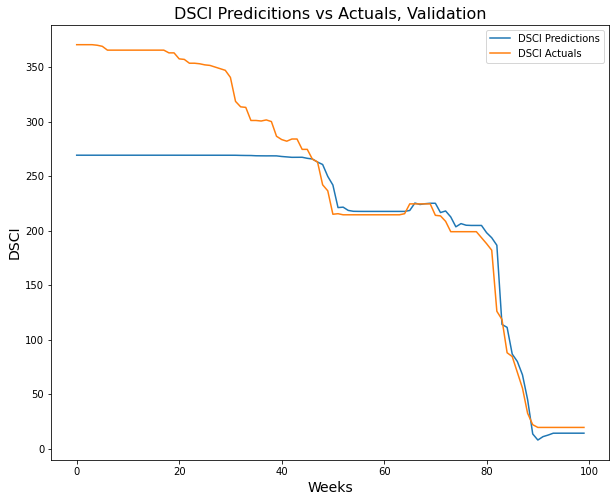

In [43]:
#plot validation set 
plt.figure(figsize = (10,8))
plt.plot(val_results['Val Predictions'], label = 'DSCI Predictions')
plt.plot(val_results['Actuals'], label = 'DSCI Actuals')
plt.xlabel("Weeks", fontsize=14)
plt.ylabel("DSCI", fontsize=14)
plt.title("DSCI Predicitions vs Actuals, Validation", fontsize=16)
plt.legend()
plt.savefig('fig3.png')

In [44]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':val_predictions, 'Actuals': y_val})
test_results

,Test Predictions,Actuals
0,269.151489,370.5
1,269.147217,370.5
2,269.146362,370.5
3,269.145874,370.5
4,269.145813,370.0
...,...,...
95,14.221318,19.5
96,14.221320,19.5
97,14.221320,19.5
98,14.221320,19.5


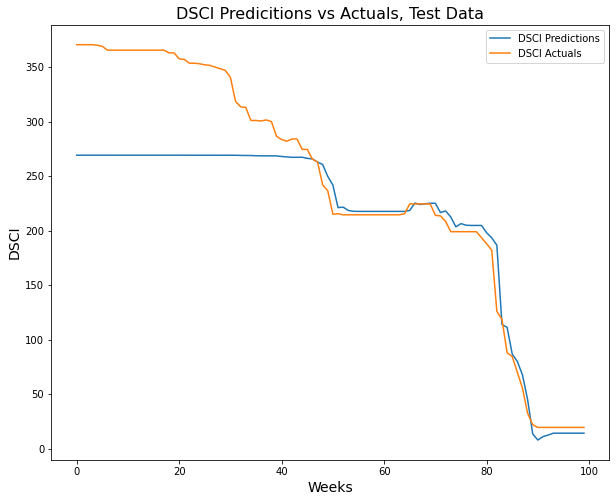

In [46]:
plt.figure(figsize = (10,8))
plt.plot(test_results['Test Predictions'], label = 'DSCI Predictions')
plt.plot(test_results['Actuals'], label = 'DSCI Actuals')
plt.xlabel("Weeks", fontsize=14)
plt.ylabel("DSCI", fontsize=14)
plt.title("DSCI Predicitions vs Actuals, Test Data", fontsize=16)
plt.legend()

In [48]:
#plotting predictions 
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(fignum, model, X, y, start = 0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.figure(figsize = (10,8))
    plt.plot(df['Predictions'][start:end], label = 'DSCI Predictions')
    plt.plot(df['Actuals'][start:end], label = 'DSCI Actuals' )
    plt.xlabel("Weeks", fontsize=14)
    plt.ylabel("DSCI", fontsize=14)
    plt.title("DSCI Predicitions vs Actuals", fontsize=16)
    plt.legend()
    return df, mse(y, predictions)

(     Predictions  Actuals
 0      14.221320     19.5
 1      14.221320     19.5
 2      14.221320     19.5
 3      14.221320     19.5
 4      14.221320     19.5
 ..           ...      ...
 184   266.438049    304.5
 185   268.297180    306.5
 186   268.590118    333.0
 187   268.974121    345.5
 188   269.069122    345.5
 
 [189 rows x 2 columns],
 272.229981886015)

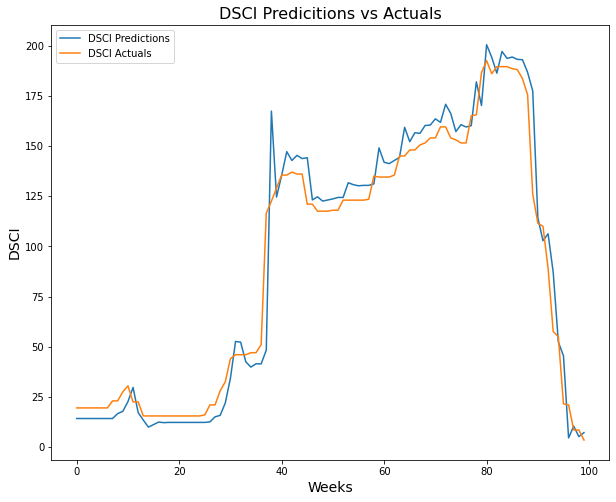

In [49]:
plot_predictions1(5, model1, X_test, y_test)

In [50]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (

In [51]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [52]:
history = (model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2]))

Epoch 1/10
 1/24 [>.............................] - ETA: 7s - loss: 44178.9258 - root_mean_squared_error: 210.1878INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


24/24 [==============================] - 1s 34ms/step - loss: 7204.7578 - root_mean_squared_error: 84.8808 - val_loss: 1460.0066 - val_root_mean_squared_error: 38.2100
Epoch 2/10
 1/24 [>.............................] - ETA: 0s - loss: 1237.6658 - root_mean_squared_error: 35.1805INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


24/24 [==============================] - 0s 21ms/step - loss: 660.4294 - root_mean_squared_error: 25.6988 - val_loss: 330.3842 - val_root_mean_squared_error: 18.1765
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 335.1135 - root_mean_squared_error: 18.3061 - val_loss: 344.4657 - val_root_mean_squared_error: 18.5598
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 299.5768 - root_mean_squared_error: 17.3083 - val_loss: 331.4019 - val_root_mean_squared_error: 18.2044
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 286.1831 - root_mean_squared_error: 16.9169 - val_loss: 343.3103 - val_root_mean_squared_error: 18.5286
Epoch 6/10
 1/24 [>.............................] - ETA: 0s - loss: 224.6627 - root_mean_squared_error: 14.9888INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


24/24 [==============================] - 0s 20ms/step - loss: 281.6490 - root_mean_squared_error: 16.7824 - val_loss: 325.5139 - val_root_mean_squared_error: 18.0420
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 272.4095 - root_mean_squared_error: 16.5048 - val_loss: 342.8838 - val_root_mean_squared_error: 18.5171
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 263.8951 - root_mean_squared_error: 16.2448 - val_loss: 373.8310 - val_root_mean_squared_error: 19.3347
Epoch 9/10
 1/24 [>.............................] - ETA: 0s - loss: 169.2630 - root_mean_squared_error: 13.0101INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


24/24 [==============================] - 0s 20ms/step - loss: 252.8874 - root_mean_squared_error: 15.9024 - val_loss: 290.8894 - val_root_mean_squared_error: 17.0555
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 241.8121 - root_mean_squared_error: 15.5503 - val_loss: 316.5549 - val_root_mean_squared_error: 17.7920


In [53]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,7204.757812,84.880844,1460.006592,38.210033
1,660.429443,25.698822,330.384186,18.176474
2,335.113464,18.306105,344.465698,18.559788
3,299.576782,17.308287,331.401947,18.204449
4,286.183105,16.916946,343.310272,18.528633
5,281.649048,16.782402,325.513916,18.042004
6,272.409485,16.504831,342.883820,18.517122
7,263.895050,16.244846,373.831024,19.334711
8,252.887390,15.902433,290.889404,17.055481
9,241.812119,15.550309,316.554871,17.791988


Text(0.5, 1.0, 'CNN MSE Loss')

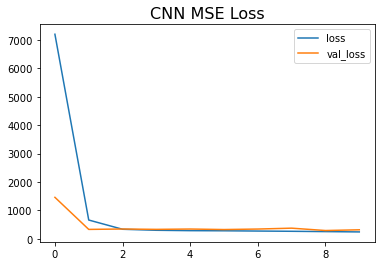

In [56]:
history_df.filter(like='loss').plot();
plt.title("CNN MSE Loss", fontsize=16)

(     Predictions  Actuals
 0      19.868820     19.5
 1      19.868820     19.5
 2      19.868820     19.5
 3      19.868820     19.5
 4      19.868820     19.5
 ..           ...      ...
 184   277.661377    304.5
 185   284.787354    306.5
 186   294.283569    333.0
 187   305.605621    345.5
 188   322.093384    345.5
 
 [189 rows x 2 columns],
 417.4851862441947)

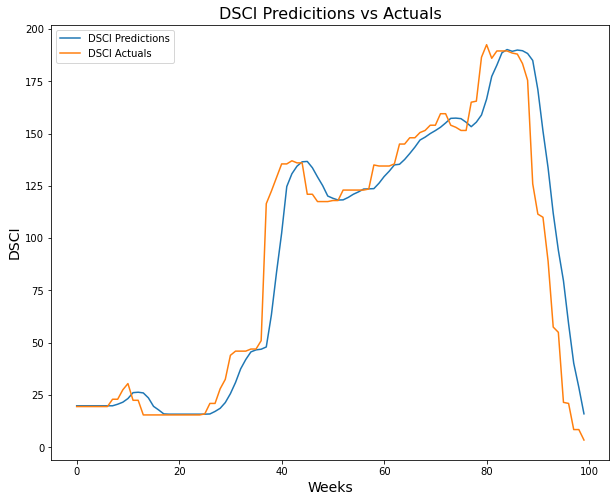

In [57]:
plot_predictions1('cnn', model2, X_test, y_test)

In [58]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [59]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [60]:
history = (model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3]))

Epoch 1/10
13/24 [===============>..............] - ETA: 0s - loss: 40107.2695 - root_mean_squared_error: 200.2680 

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


24/24 [==============================] - 4s 120ms/step - loss: 40953.6016 - root_mean_squared_error: 202.3700 - val_loss: 64522.1719 - val_root_mean_squared_error: 254.0121
Epoch 2/10
18/24 [=====================>........] - ETA: 0s - loss: 37607.6875 - root_mean_squared_error: 193.9270

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


24/24 [==============================] - 2s 102ms/step - loss: 35938.3164 - root_mean_squared_error: 189.5740 - val_loss: 56152.0547 - val_root_mean_squared_error: 236.9642
Epoch 3/10
17/24 [====================>.........] - ETA: 0s - loss: 30492.0293 - root_mean_squared_error: 174.6197

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


24/24 [==============================] - 3s 111ms/step - loss: 29845.8828 - root_mean_squared_error: 172.7596 - val_loss: 46912.2383 - val_root_mean_squared_error: 216.5923
Epoch 4/10
16/24 [===================>..........] - ETA: 0s - loss: 24840.7832 - root_mean_squared_error: 157.6096

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


24/24 [==============================] - 2s 98ms/step - loss: 23364.0605 - root_mean_squared_error: 152.8531 - val_loss: 37167.3359 - val_root_mean_squared_error: 192.7883
Epoch 5/10
19/24 [======================>.......] - ETA: 0s - loss: 17227.0488 - root_mean_squared_error: 131.2518

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


24/24 [==============================] - 3s 111ms/step - loss: 17116.4805 - root_mean_squared_error: 130.8300 - val_loss: 27855.3398 - val_root_mean_squared_error: 166.8992
Epoch 6/10
18/24 [=====================>........] - ETA: 0s - loss: 12827.4658 - root_mean_squared_error: 113.2584

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


24/24 [==============================] - 2s 97ms/step - loss: 11749.1689 - root_mean_squared_error: 108.3936 - val_loss: 19718.8887 - val_root_mean_squared_error: 140.4240
Epoch 7/10
20/24 [========================>.....] - ETA: 0s - loss: 8103.7744 - root_mean_squared_error: 90.0210

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


24/24 [==============================] - 2s 108ms/step - loss: 7682.0415 - root_mean_squared_error: 87.6473 - val_loss: 13817.4229 - val_root_mean_squared_error: 117.5475
Epoch 8/10
21/24 [=========================>....] - ETA: 0s - loss: 5248.3403 - root_mean_squared_error: 72.4454

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


24/24 [==============================] - 3s 131ms/step - loss: 5047.9531 - root_mean_squared_error: 71.0490 - val_loss: 9713.9326 - val_root_mean_squared_error: 98.5593
Epoch 9/10
16/24 [===================>..........] - ETA: 0s - loss: 3789.1040 - root_mean_squared_error: 61.5557

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


24/24 [==============================] - 3s 113ms/step - loss: 3425.7791 - root_mean_squared_error: 58.5302 - val_loss: 6964.1914 - val_root_mean_squared_error: 83.4517
Epoch 10/10
16/24 [===================>..........] - ETA: 0s - loss: 2700.0950 - root_mean_squared_error: 51.9624

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


24/24 [==============================] - 3s 132ms/step - loss: 2444.9695 - root_mean_squared_error: 49.4466 - val_loss: 5004.0039 - val_root_mean_squared_error: 70.7390


(     Predictions  Actuals
 0      21.633200     19.5
 1      21.633200     19.5
 2      21.633200     19.5
 3      21.633200     19.5
 4      21.633200     19.5
 ..           ...      ...
 184   241.135452    304.5
 185   241.211624    306.5
 186   241.213120    333.0
 187   241.219193    345.5
 188   241.219513    345.5
 
 [189 rows x 2 columns],
 405.52476863461914)

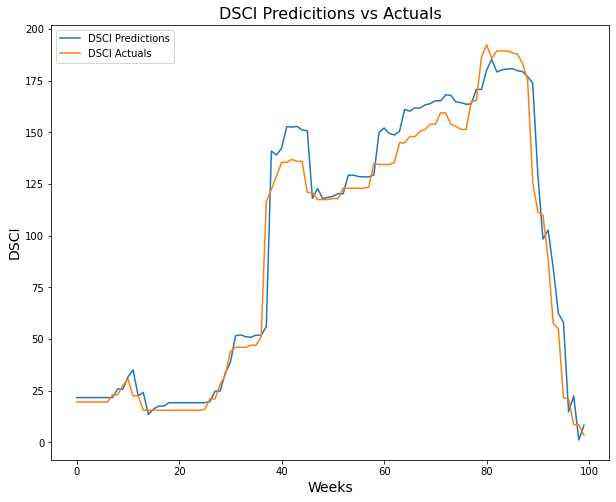

In [61]:
plot_predictions1(7, model3, X_test, y_test)

In [62]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,40953.601562,202.369965,64522.171875,254.012146
1,35938.316406,189.574036,56152.054688,236.964249
2,29845.882812,172.759613,46912.238281,216.592331
3,23364.060547,152.853073,37167.335938,192.788315
4,17116.480469,130.829971,27855.339844,166.899185
5,11749.168945,108.393585,19718.888672,140.423965
6,7682.041504,87.647255,13817.422852,117.547531
7,5047.953125,71.048950,9713.932617,98.559288
8,3425.779053,58.530155,6964.191406,83.451729
9,2444.969482,49.446632,5004.003906,70.738983


Text(0.5, 1.0, 'GRU MSE Loss')

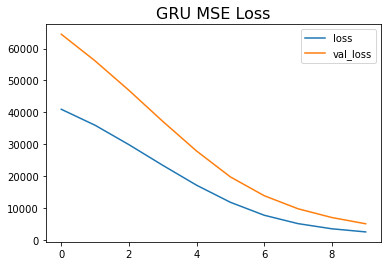

In [65]:
history_df.filter(like='loss').plot();
plt.title("GRU MSE Loss", fontsize=16)


In [66]:
dsci_df = pd.DataFrame({'DSCI':west['DSCI']})
dsci_df['Seconds']=dsci_df.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year = 365.2425*day
dsci_df['year sin'] = np.sin(dsci_df['Seconds'] * (2*np.pi/year))
dsci_df['year cos'] = np.cos(dsci_df['Seconds'] * (2*np.pi/year))
dsci_df

,DSCI,Seconds,year sin,year cos
ValidEnd,,,,
2001-01-01,0.0,9.783072e+08,0.008300,0.999966
2001-01-08,15.5,9.789120e+08,0.128365,0.991727
2001-01-15,29.5,9.795168e+08,0.246570,0.969125
2001-01-22,15.0,9.801216e+08,0.361204,0.932487
2001-01-29,28.5,9.807264e+08,0.470607,0.882343
...,...,...,...,...
2020-11-30,304.5,1.606694e+09,-0.513800,0.857910
2020-12-07,306.5,1.607299e+09,-0.407020,0.913419
2020-12-14,333.0,1.607904e+09,-0.294344,0.955699


In [67]:
dsci_df.drop('Seconds', axis=1, inplace=True)

In [68]:
def df_to_X_y2(df, windowsize=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-windowsize):
        row = [r for r in df_as_np[i:i+windowsize]]
        X.append(row)
        label = df_as_np[i+5][0]
        y.append(label)
    return np.array(X), np.array(y)

In [69]:
X2, y2 = df_to_X_y2(dsci_df)
X2.shape, y2.shape

((1038, 6, 3), (1038,))

In [70]:
X2_train, y2_train = X2[:750], y2[:750]
X2_val, y2_val = X2[750:850], y2[750:850]
X2_test, y2_test = X2[850:], y2[850:]

In [71]:
dsci_training_mean = np.mean(X2_train[:, :, 0])
temp_training_sd = np.std(X2_train[:, :, 0])

def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - dsci_training_mean/temp_training_sd)
    return X


In [72]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.79446130e+01,  9.65598082e-01, -2.60039120e-01],
        [ 1.79446130e+01,  9.27367405e-01, -3.74151970e-01],
        [ 1.79446130e+01,  8.75705362e-01, -4.82845853e-01],
        [ 1.79446130e+01,  8.11360193e-01, -5.84546523e-01],
        [ 1.79446130e+01,  7.35263828e-01, -6.77781014e-01],
        [ 1.79446130e+01,  6.48518397e-01, -7.61198981e-01]],

       [[ 1.79446130e+01,  9.27367405e-01, -3.74151970e-01],
        [ 1.79446130e+01,  8.75705362e-01, -4.82845853e-01],
        [ 1.79446130e+01,  8.11360193e-01, -5.84546523e-01],
        [ 1.79446130e+01,  7.35263828e-01, -6.77781014e-01],
        [ 1.79446130e+01,  6.48518397e-01, -7.61198981e-01],
        [ 1.79446130e+01,  5.52380262e-01, -8.33592254e-01]],

       [[ 1.79446130e+01,  8.75705362e-01, -4.82845853e-01],
        [ 1.79446130e+01,  8.11360193e-01, -5.84546523e-01],
        [ 1.79446130e+01,  7.35263828e-01, -6.77781014e-01],
        [ 1.79446130e+01,  6.48518397e-01, -7.61198981e-01],
        [ 1.79446130

In [76]:
tmax_dsci_df = pd.concat([west['avg_tmax'], dsci_df], axis=1)

In [77]:
prcp_dsci_df = pd.concat([west['total_avg_prcp_inches'], dsci_df], axis=1)

In [78]:
tmax_dsci_df.head()

,avg_tmax,DSCI,year sin,year cos
ValidEnd,,,,
2001-01-01,55.340909,0.0,0.008300,0.999966
2001-01-08,56.907792,15.5,0.128365,0.991727
2001-01-15,45.813312,29.5,0.246570,0.969125
2001-01-22,47.125649,15.0,0.361204,0.932487
2001-01-29,46.303571,28.5,0.470607,0.882343


In [79]:
prcp_dsci_df.head()

,total_avg_prcp_inches,DSCI,year sin,year cos
ValidEnd,,,,
2001-01-01,0.000000,0.0,0.008300,0.999966
2001-01-08,0.573636,15.5,0.128365,0.991727
2001-01-15,1.895909,29.5,0.246570,0.969125
2001-01-22,0.072500,15.0,0.361204,0.932487
2001-01-29,1.511818,28.5,0.470607,0.882343


In [80]:
def df_to_X_y3(df, windowsize=7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-windowsize):
        row = [r for r in df_as_np[i:i+windowsize]]
        X.append(row)
        label = df_as_np[i+windowsize][0], df_as_np[i+windowsize][1]
        y.append(label)
    return np.array(X), np.array(y)

In [81]:
X3, y3 = df_to_X_y3(prcp_dsci_df)
X3.shape, y3.shape

((1037, 7, 4), (1037, 2))

In [82]:
X3_train, y3_train = X3[:750], y3[:750]
X3_val, y3_val = X3[750:850], y3[750:850]
X3_test, y3_test = X3[850:], y3[850:]

In [83]:
#Standardizing for Preprocessing. Followed video instructions, but could try a MinMax scaler next time
prcp_training_mean3 = np.mean(X3_train[:, :, 0])
prcp_training_std3 = np.mean(X3_train[:, :, 0])

dsci_training_mean3 = np.mean(X3_train[:, :, 1])
dsci_training_sd3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
    X[:, :, 0] = (X[:, :, 0] - prcp_training_mean3/prcp_training_std3)
    X[:, :, 1] = (X[:, :,1] - dsci_training_mean3/dsci_training_sd3)
    return X
def preprocess_out(X):
    X[:, 0] = (X[:, 0] - prcp_training_mean3/prcp_training_std3)
    X[:, 1] = (X[:,1] - dsci_training_mean3/dsci_training_sd3)
    return X



In [84]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

array([[[-3.33333333e-02,  1.79432586e+01,  9.65598082e-01,
         -2.60039120e-01],
        [-2.27500000e-01,  1.79432586e+01,  9.27367405e-01,
         -3.74151970e-01],
        [-7.27500000e-01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        ...,
        [-7.60000000e-01,  1.79432586e+01,  7.35263828e-01,
         -6.77781014e-01],
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01]],

       [[-2.27500000e-01,  1.79432586e+01,  9.27367405e-01,
         -3.74151970e-01],
        [-7.27500000e-01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        [-5.22500000e-01,  1.79432586e+01,  8.11360193e-01,
         -5.84546523e-01],
        ...,
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01],
        [-9.650

In [85]:
preprocess_out(X3_train)
preprocess_out(X3_val)
preprocess_out(X3_test)

array([[[-1.03333333e+00,  1.69432586e+01, -3.44019180e-02,
         -1.26003912e+00],
        [-1.78424143e+00,  1.63865171e+01, -6.29374023e-01,
         -1.93089340e+00],
        [-7.27500000e-01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        ...,
        [-7.60000000e-01,  1.79432586e+01,  7.35263828e-01,
         -6.77781014e-01],
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01]],

       [[-1.22750000e+00,  1.69432586e+01, -7.26325951e-02,
         -1.37415197e+00],
        [-2.28424143e+00,  1.63865171e+01, -6.81036065e-01,
         -2.03958728e+00],
        [-5.22500000e-01,  1.79432586e+01,  8.11360193e-01,
         -5.84546523e-01],
        ...,
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01],
        [-9.650

In [86]:
model5 = Sequential()
model5.add(InputLayer((7,4)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                17664     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18,202
Trainable params: 18,202
Non-trainable params: 0
_________________________________________________________________


In [87]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [88]:
history = (model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5]))

Epoch 1/10
13/24 [===============>..............] - ETA: 0s - loss: 21967.0215 - root_mean_squared_error: 148.2128 

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


24/24 [==============================] - 4s 137ms/step - loss: 21423.3965 - root_mean_squared_error: 146.3673 - val_loss: 32508.1543 - val_root_mean_squared_error: 180.3002
Epoch 2/10
15/24 [=================>............] - ETA: 0s - loss: 19172.2500 - root_mean_squared_error: 138.4639

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


24/24 [==============================] - 4s 160ms/step - loss: 18923.0938 - root_mean_squared_error: 137.5612 - val_loss: 27538.5449 - val_root_mean_squared_error: 165.9474
Epoch 3/10
16/24 [===================>..........] - ETA: 0s - loss: 16556.3672 - root_mean_squared_error: 128.6715

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


24/24 [==============================] - 3s 140ms/step - loss: 15199.5586 - root_mean_squared_error: 123.2865 - val_loss: 21882.7578 - val_root_mean_squared_error: 147.9282
Epoch 4/10
12/24 [==============>...............] - ETA: 0s - loss: 11570.0928 - root_mean_squared_error: 107.5644

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


24/24 [==============================] - 3s 110ms/step - loss: 10996.1357 - root_mean_squared_error: 104.8625 - val_loss: 15905.0791 - val_root_mean_squared_error: 126.1153
Epoch 5/10
16/24 [===================>..........] - ETA: 0s - loss: 8138.6357 - root_mean_squared_error: 90.2144

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


24/24 [==============================] - 3s 142ms/step - loss: 7138.1929 - root_mean_squared_error: 84.4878 - val_loss: 10261.5381 - val_root_mean_squared_error: 101.2992
Epoch 6/10
13/24 [===============>..............] - ETA: 0s - loss: 4189.3452 - root_mean_squared_error: 64.7252

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


24/24 [==============================] - 3s 141ms/step - loss: 4056.9500 - root_mean_squared_error: 63.6942 - val_loss: 6288.6401 - val_root_mean_squared_error: 79.3009
Epoch 7/10
21/24 [=========================>....] - ETA: 0s - loss: 2278.3103 - root_mean_squared_error: 47.7316

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


24/24 [==============================] - 3s 134ms/step - loss: 2293.9604 - root_mean_squared_error: 47.8953 - val_loss: 3872.8406 - val_root_mean_squared_error: 62.2322
Epoch 8/10
14/24 [================>.............] - ETA: 0s - loss: 1525.7262 - root_mean_squared_error: 39.0605

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


24/24 [==============================] - 4s 152ms/step - loss: 1403.6304 - root_mean_squared_error: 37.4651 - val_loss: 2504.5735 - val_root_mean_squared_error: 50.0457
Epoch 9/10
23/24 [===========================>..] - ETA: 0s - loss: 930.3464 - root_mean_squared_error: 30.5016

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


24/24 [==============================] - 3s 148ms/step - loss: 933.1204 - root_mean_squared_error: 30.5470 - val_loss: 1672.0652 - val_root_mean_squared_error: 40.8909
Epoch 10/10
13/24 [===============>..............] - ETA: 0s - loss: 794.8705 - root_mean_squared_error: 28.1934 

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


24/24 [==============================] - 3s 111ms/step - loss: 643.1550 - root_mean_squared_error: 25.3605 - val_loss: 1112.6915 - val_root_mean_squared_error: 33.3570


In [89]:
def plot_predictions2(fignum, model, X, y, start=0, end = 100):
    predictions = model.predict(X)
    prcp_preds, dsci_preds = predictions[:, 0], predictions[:, 1]
    prcp_actuals, dsci_actuals = y[:, 0], y[:, 1]
    df = pd.DataFrame(data= {
        'Precipitation Predictions': prcp_preds, 
        'Precipitation Actuals': prcp_actuals,
        'DSCI Pred': dsci_preds,
        'DSCI Actuals': dsci_actuals
        })
    plt.plot(df['Precipitation Predictions'][start:end], label='Precipitation Pred')
    plt.plot(df['Precipitation Actuals'][start:end], label='Precipitation Actual')
    plt.plot(df['DSCI Pred'][start:end], label = 'DSCI Predictions')
    plt.plot(df['DSCI Actuals'][start:end], label = 'DSCI Actuals')
    plt.legend(loc= 'upper left')
    plt.savefig(f'fig{fignum}.png')

    return df[start:end]


,Precipitation Predictions,Precipitation Actuals,DSCI Pred,DSCI Actuals
0,1.314578,0.035000,18.626205,19.5
1,1.314059,0.749167,18.673901,19.5
2,1.304832,0.023333,15.284334,19.5
3,1.302736,0.010000,18.031218,19.5
4,1.316851,0.005000,19.152168,19.5
...,...,...,...,...
95,1.287477,0.760000,16.500763,8.5
96,0.955018,1.267500,5.386814,8.5
97,0.861500,0.435000,6.508031,3.5
98,0.811578,0.490000,2.765819,3.0


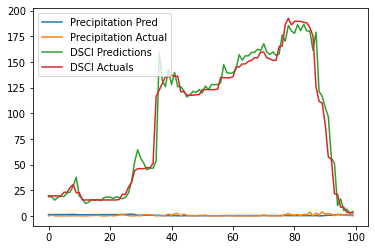

In [90]:
plot_predictions2(11, model5, X3_test, y3_test)

In [91]:
def postprocess_dsci(arr):
    arr = (arr*dsci_training_sd3) + dsci_training_mean3
    return arr

def postprocess_prcp(arr):
    arr = (arr*prcp_training_std3) + prcp_training_mean3
    return arr

In [92]:
def plot_predictions2(fignum, model, X, y, start=0, end = 100):
    predictions = model.predict(X)
    prcp_preds, dsci_preds = postprocess_prcp(predictions[:, 0]), postprocess_dsci(predictions[:, 1])
    prcp_actuals, dsci_actuals = postprocess_prcp(y[:, 0]), postprocess_dsci(y[:, 1])
    df = pd.DataFrame(data= {
        'Precipitation Predictions': prcp_preds, 
        'Precipitation Actuals': prcp_actuals,
        'DSCI Pred': dsci_preds,
        'DSCI Actuals': dsci_actuals
        })
    plt.plot(df['Precipitation Predictions'][start:end])
    plt.plot(df['Precipitation Actuals'][start:end])
    plt.plot(df['DSCI Pred'][start:end])
    plt.plot(df['DSCI Actuals'][start:end])
    plt.savefig(f'fig{str(fignum)}.png')
    return df[start:end]

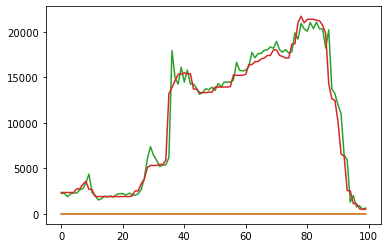

In [93]:
post_processed_df = plot_predictions2(12, model5, X3_test, y3_test)

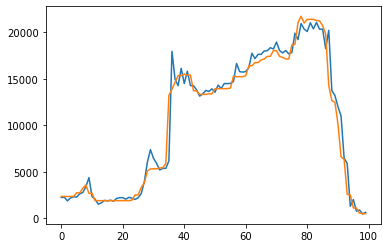

In [94]:
start, end = 0, 100
plt.plot(post_processed_df['DSCI Pred'][start: end])
plt.plot(post_processed_df['DSCI Actuals'][start: end])

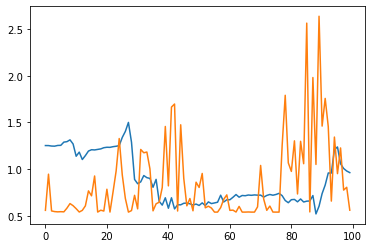

In [95]:
start, end = 0, 100
plt.plot(post_processed_df['Precipitation Predictions'][start: end])
plt.plot(post_processed_df['Precipitation Actuals'][start: end])

In [96]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,21423.396484,146.367325,32508.154297,180.300171
1,18923.093750,137.561234,27538.544922,165.947403
2,15199.558594,123.286476,21882.757812,147.928223
3,10996.135742,104.862457,15905.079102,126.115334
4,7138.192871,84.487823,10261.538086,101.299248
5,4056.949951,63.694191,6288.640137,79.300941
6,2293.960449,47.895306,3872.840576,62.232151
7,1403.630371,37.465054,2504.573486,50.045715
8,933.120361,30.547020,1672.065186,40.890892
9,643.155029,25.360502,1112.691528,33.357033


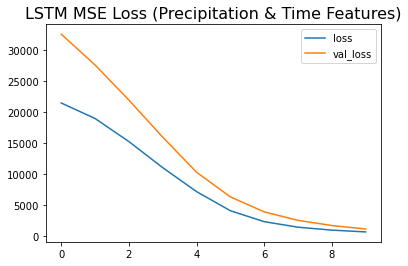

In [97]:
history_df.filter(like='loss').plot();
plt.title("LSTM MSE Loss (Precipitation & Time Features)", fontsize=16)
plt.savefig('fig13.png')

In [98]:
X4, y4 = df_to_X_y3(tmax_dsci_df)
X4.shape, y4.shape

((1037, 7, 4), (1037, 2))

In [99]:
X4_train, y4_train = X4[:750], y4[:750]
X4_val, y4_val = X4[750:850], y4[750:850]
X4_test, y4_test = X4[850:], y4[850:]

In [100]:
preprocess3(X4_train)
preprocess3(X4_val)
preprocess3(X4_test)

array([[[ 6.48452381e+01,  1.79432586e+01,  9.65598082e-01,
         -2.60039120e-01],
        [ 6.68095238e+01,  1.79432586e+01,  9.27367405e-01,
         -3.74151970e-01],
        [ 6.71130952e+01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        ...,
        [ 7.00535714e+01,  1.79432586e+01,  7.35263828e-01,
         -6.77781014e-01],
        [ 7.27797619e+01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [ 7.89464286e+01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01]],

       [[ 6.68095238e+01,  1.79432586e+01,  9.27367405e-01,
         -3.74151970e-01],
        [ 6.71130952e+01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        [ 7.46130952e+01,  1.79432586e+01,  8.11360193e-01,
         -5.84546523e-01],
        ...,
        [ 7.27797619e+01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [ 7.89464286e+01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01],
        [ 8.205

In [101]:
preprocess_out(X4_train)
preprocess_out(X4_val)
preprocess_out(X4_test)

array([[[ 6.38452381e+01,  1.69432586e+01, -3.44019180e-02,
         -1.26003912e+00],
        [ 6.52527824e+01,  1.63865171e+01, -6.29374023e-01,
         -1.93089340e+00],
        [ 6.71130952e+01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        ...,
        [ 7.00535714e+01,  1.79432586e+01,  7.35263828e-01,
         -6.77781014e-01],
        [ 7.27797619e+01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [ 7.89464286e+01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01]],

       [[ 6.58095238e+01,  1.69432586e+01, -7.26325951e-02,
         -1.37415197e+00],
        [ 6.55563538e+01,  1.63865171e+01, -6.81036065e-01,
         -2.03958728e+00],
        [ 7.46130952e+01,  1.79432586e+01,  8.11360193e-01,
         -5.84546523e-01],
        ...,
        [ 7.27797619e+01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [ 7.89464286e+01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01],
        [ 8.205

In [102]:
model6 = Sequential()
model6.add(InputLayer((7,4)))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                17664     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18,202
Trainable params: 18,202
Non-trainable params: 0
_________________________________________________________________


In [103]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [104]:
history = (model6.fit(X4_train, y4_train, validation_data=(X4_val, y4_val), epochs=10, callbacks=[cp6]))

Epoch 1/10
13/24 [===============>..............] - ETA: 0s - loss: 24512.7832 - root_mean_squared_error: 156.5656 

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


24/24 [==============================] - 5s 144ms/step - loss: 23649.6328 - root_mean_squared_error: 153.7844 - val_loss: 34387.7227 - val_root_mean_squared_error: 185.4393
Epoch 2/10
16/24 [===================>..........] - ETA: 0s - loss: 20935.5508 - root_mean_squared_error: 144.6912

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


24/24 [==============================] - 3s 127ms/step - loss: 20761.2031 - root_mean_squared_error: 144.0875 - val_loss: 28733.9121 - val_root_mean_squared_error: 169.5108
Epoch 3/10
20/24 [========================>.....] - ETA: 0s - loss: 15492.2891 - root_mean_squared_error: 124.4680

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


24/24 [==============================] - 3s 125ms/step - loss: 15419.4346 - root_mean_squared_error: 124.1750 - val_loss: 20258.0820 - val_root_mean_squared_error: 142.3309
Epoch 4/10
24/24 [==============================] - ETA: 0s - loss: 9482.6309 - root_mean_squared_error: 97.3788  

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


24/24 [==============================] - 3s 125ms/step - loss: 9482.6309 - root_mean_squared_error: 97.3788 - val_loss: 12551.8760 - val_root_mean_squared_error: 112.0352
Epoch 5/10
22/24 [==========================>...] - ETA: 0s - loss: 5346.1011 - root_mean_squared_error: 73.1170

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


24/24 [==============================] - 3s 135ms/step - loss: 5273.3340 - root_mean_squared_error: 72.6177 - val_loss: 7070.0669 - val_root_mean_squared_error: 84.0837
Epoch 6/10
13/24 [===============>..............] - ETA: 0s - loss: 3459.9858 - root_mean_squared_error: 58.8216

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


24/24 [==============================] - 3s 125ms/step - loss: 2830.9104 - root_mean_squared_error: 53.2063 - val_loss: 4022.6306 - val_root_mean_squared_error: 63.4242
Epoch 7/10
11/24 [============>.................] - ETA: 0s - loss: 1687.3856 - root_mean_squared_error: 41.0778

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


24/24 [==============================] - 3s 142ms/step - loss: 1708.7258 - root_mean_squared_error: 41.3367 - val_loss: 2512.3701 - val_root_mean_squared_error: 50.1236
Epoch 8/10
14/24 [================>.............] - ETA: 0s - loss: 1421.6980 - root_mean_squared_error: 37.7054

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


24/24 [==============================] - 3s 134ms/step - loss: 1200.1399 - root_mean_squared_error: 34.6430 - val_loss: 1601.1289 - val_root_mean_squared_error: 40.0141
Epoch 9/10
21/24 [=========================>....] - ETA: 0s - loss: 901.7194 - root_mean_squared_error: 30.0286

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


24/24 [==============================] - 3s 139ms/step - loss: 883.6006 - root_mean_squared_error: 29.7254 - val_loss: 1106.9359 - val_root_mean_squared_error: 33.2706
Epoch 10/10
14/24 [================>.............] - ETA: 0s - loss: 755.5113 - root_mean_squared_error: 27.4866

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


24/24 [==============================] - 3s 123ms/step - loss: 696.3206 - root_mean_squared_error: 26.3879 - val_loss: 762.1297 - val_root_mean_squared_error: 27.6067


In [105]:
def plot_predictions3(fignum, model, X, y, start=0, end = 100):
    predictions = model.predict(X)
    temp_preds, dsci_preds = predictions[:, 0], predictions[:, 1]
    temp_actuals, dsci_actuals = y[:, 0], y[:, 1]
    df = pd.DataFrame(data= {
        'High Temperature Predictions': temp_preds, 
        'High Temperature Actuals': temp_actuals,
        'DSCI Pred': dsci_preds,
        'DSCI Actuals': dsci_actuals
        })
    plt.figure(figsize = (10,8))
    plt.plot(df['High Temperature Predictions'][start:end], label='High Temperature Predictions')
    plt.plot(df['High Temperature Actuals'][start:end], label='High Temperature Actuals')
    plt.plot(df['DSCI Pred'][start:end], label = 'DSCI Predictions')
    plt.plot(df['DSCI Actuals'][start:end], label = 'DSCI Actuals')
    plt.legend(loc= 'upper left')
    
    plt.savefig(f'fig{fignum}.png')

    return df[start:end]

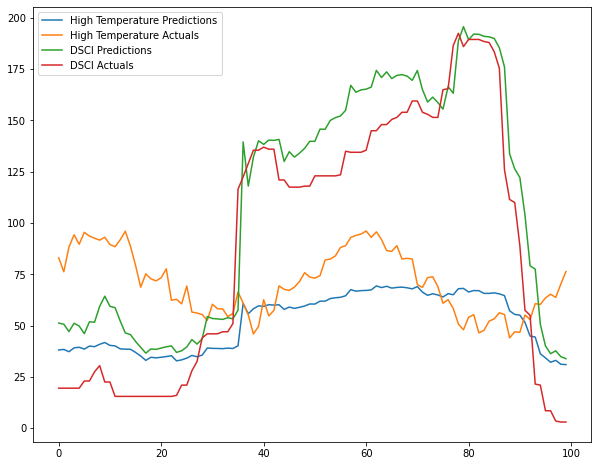

In [106]:
post_processed_df2 = plot_predictions3(16, model6, X4_test, y4_test)

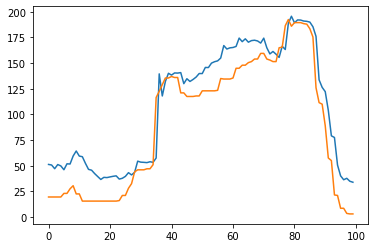

In [107]:
start, end = 0, 100
plt.plot(post_processed_df2['DSCI Pred'][start: end])
plt.plot(post_processed_df2['DSCI Actuals'][start: end])
plt.savefig('fig15.png')

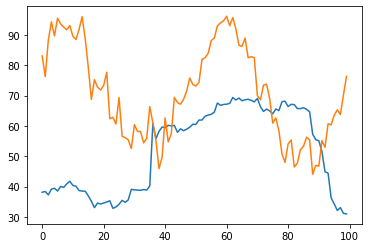

In [108]:
start, end = 0, 100
plt.plot(post_processed_df2['High Temperature Predictions'][start: end])
plt.plot(post_processed_df2['High Temperature Actuals'][start: end])

In [109]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,23649.632812,153.784378,34387.722656,185.439270
1,20761.203125,144.087494,28733.912109,169.510803
2,15419.434570,124.175018,20258.082031,142.330887
3,9482.630859,97.378799,12551.875977,112.035156
4,5273.333984,72.617729,7070.066895,84.083687
5,2830.910400,53.206299,4022.630615,63.424213
6,1708.725830,41.336735,2512.370117,50.123550
7,1200.139893,34.643036,1601.128906,40.014111
8,883.600586,29.725420,1106.935913,33.270649
9,696.320618,26.387886,762.129700,27.606697


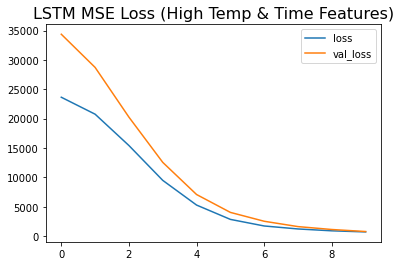

In [110]:
history_df.filter(like='loss').plot();
plt.title("LSTM MSE Loss (High Temp & Time Features)", fontsize=16)
plt.savefig('fig17.png')

#### Model Summary

Model|MSE|Val Loss|RMSE|
|---|---|---|---|
|LSTM|544.09|760.45|27.57|
|CNN|138.06|123.14|11.75|
|GRU|757.87|1187.01|44.91|
|LSTM M.V.|615.95|1142.63|33.8|
|LSTM Precip.|757.87|2000.4|44.7|
|LSTM Temp|4628.32|8033.28|89.62|